# EDA

In [1]:
spark

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
5,application_1635428932804_0006,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Load Data

In [2]:
#Upload the dataset in your s3 bucket.
#Moidfy this command according to your s3 bucket.
df = spark.read.csv('s3a://shrianshs3testbucket/CTR_dataset/ctr_traindata2.csv', header=True, inferSchema=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[id: decimal(20,0), click: int, hour: int, C1: int, banner_pos: int, site_id: string, site_domain: string, site_category: string, app_id: string, app_domain: string, app_category: string, device_id: string, device_ip: string, device_model: string, device_type: int, device_conn_type: int, C14: int, C15: int, C16: int, C17: int, C18: int, C19: int, C20: int, C21: int]

In [4]:
df.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+--------+----+----------+--------+-----------+-------------+--------+----------+------------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+
|                  id|click|    hour|  C1|banner_pos| site_id|site_domain|site_category|  app_id|app_domain|app_category|device_id|device_ip|device_model|device_type|device_conn_type|  C14|C15|C16| C17|C18|C19|   C20|C21|
+--------------------+-----+--------+----+----------+--------+-----------+-------------+--------+----------+------------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+
| 1000009418151094273|    0|14102100|1005|         0|1fbe01fe|   f3845767|     28905ebd|ecad2386|  7801e8d9|    07d7df22| a99f214a| ddd2926e|    44956a24|          1|               2|15706|320| 50|1722|  0| 35|    -1| 79|
|10000169349117863715|    0|14102100|1005|         0|1fbe01fe|   f3845767|     28905ebd|ecad2386|  7801e8d9|    

In [5]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- id: decimal(20,0) (nullable = true)
 |-- click: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- C1: integer (nullable = true)
 |-- banner_pos: integer (nullable = true)
 |-- site_id: string (nullable = true)
 |-- site_domain: string (nullable = true)
 |-- site_category: string (nullable = true)
 |-- app_id: string (nullable = true)
 |-- app_domain: string (nullable = true)
 |-- app_category: string (nullable = true)
 |-- device_id: string (nullable = true)
 |-- device_ip: string (nullable = true)
 |-- device_model: string (nullable = true)
 |-- device_type: integer (nullable = true)
 |-- device_conn_type: integer (nullable = true)
 |-- C14: integer (nullable = true)
 |-- C15: integer (nullable = true)
 |-- C16: integer (nullable = true)
 |-- C17: integer (nullable = true)
 |-- C18: integer (nullable = true)
 |-- C19: integer (nullable = true)
 |-- C20: integer (nullable = true)
 |-- C21: integer (nullable = true)

In [6]:
df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

In [7]:
df.head(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(id=Decimal('1000009418151094273'), click=0, hour=14102100, C1=1005, banner_pos=0, site_id='1fbe01fe', site_domain='f3845767', site_category='28905ebd', app_id='ecad2386', app_domain='7801e8d9', app_category='07d7df22', device_id='a99f214a', device_ip='ddd2926e', device_model='44956a24', device_type=1, device_conn_type=2, C14=15706, C15=320, C16=50, C17=1722, C18=0, C19=35, C20=-1, C21=79), Row(id=Decimal('10000169349117863715'), click=0, hour=14102100, C1=1005, banner_pos=0, site_id='1fbe01fe', site_domain='f3845767', site_category='28905ebd', app_id='ecad2386', app_domain='7801e8d9', app_category='07d7df22', device_id='a99f214a', device_ip='96809ac8', device_model='711ee120', device_type=1, device_conn_type=0, C14=15704, C15=320, C16=50, C17=1722, C18=0, C19=35, C20=100084, C21=79), Row(id=Decimal('10000371904215119486'), click=0, hour=14102100, C1=1005, banner_pos=0, site_id='1fbe01fe', site_domain='f3845767', site_category='28905ebd', app_id='ecad2386', app_domain='7801e8d9', a

### Removing Columns which are String & not required

In [8]:
df_selected = df.select(['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
df_selected.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(click=0, C1=1005, banner_pos=0, device_type=1, device_conn_type=2, C14=15706, C15=320, C16=50, C17=1722, C18=0, C19=35, C20=-1, C21=79)

In [10]:
df_selected.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+----+----------+-----------+----------------+-----+---+---+----+---+---+------+---+
|click|  C1|banner_pos|device_type|device_conn_type|  C14|C15|C16| C17|C18|C19|   C20|C21|
+-----+----+----------+-----------+----------------+-----+---+---+----+---+---+------+---+
|    0|1005|         0|          1|               2|15706|320| 50|1722|  0| 35|    -1| 79|
|    0|1005|         0|          1|               0|15704|320| 50|1722|  0| 35|100084| 79|
|    0|1005|         0|          1|               0|15704|320| 50|1722|  0| 35|100084| 79|
|    0|1005|         0|          1|               0|15706|320| 50|1722|  0| 35|100084| 79|
|    0|1005|         1|          1|               0|18993|320| 50|2161|  0| 35|    -1|157|
|    0|1005|         0|          1|               0|16920|320| 50|1899|  0|431|100077|117|
|    0|1005|         0|          1|               0|20362|320| 50|2333|  0| 39|    -1|157|
|    0|1005|         1|          1|               0|20632|320| 50|2374|  3| 39|    -1| 23|

In [11]:
df_selected.select("click").distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+
|click|
+-----+
|    1|
|    0|
+-----+

In [12]:
df_selected.select("C14").distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+
|  C14|
+-----+
|20382|
|21484|
|21311|
|12008|
|21411|
|18948|
|15543|
|20628|
|19988|
|21695|
|17263|
|16685|
|18947|
|20004|
| 1266|
|20362|
|11996|
|15547|
|15010|
|12472|
+-----+
only showing top 20 rows

In [13]:
df_selected.groupby('click').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-----+
|click|count|
+-----+-----+
|    1|17490|
|    0|82509|
+-----+-----+

In [14]:
from pyspark.sql.functions import col, countDistinct

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
df_selected.agg(countDistinct("click")).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------+
|count(DISTINCT click)|
+---------------------+
|                    2|
+---------------------+

In [16]:
df_selected.agg(countDistinct("C14")).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|count(DISTINCT C14)|
+-------------------+
|                420|
+-------------------+

In [17]:
df_selected.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

In [18]:
for c in df_selected.columns:
    print(c)
    

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

click
C1
banner_pos
device_type
device_conn_type
C14
C15
C16
C17
C18
C19
C20
C21

### Get Distinct Count of Categorical Features

In [19]:
df_selected.agg(*(countDistinct(col(c)).alias(c) for c in df_selected.columns)).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+---+----------+-----------+----------------+---+---+---+---+---+---+---+---+
|click| C1|banner_pos|device_type|device_conn_type|C14|C15|C16|C17|C18|C19|C20|C21|
+-----+---+----------+-----------+----------------+---+---+---+---+---+---+---+---+
|    2|  6|         5|          4|               4|420|  5|  6|128|  4| 37|137| 29|
+-----+---+----------+-----------+----------------+---+---+---+---+---+---+---+---+

### Avoid features which are having huge distinct count, Since that many columns will be created while One Hot Encoding

In [20]:
df_filtered = df_selected.select(['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
df_filtered.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+----+----------+-----------+----------------+---+---+---+
|click|  C1|banner_pos|device_type|device_conn_type|C15|C16|C18|
+-----+----+----------+-----------+----------------+---+---+---+
|    0|1005|         0|          1|               2|320| 50|  0|
|    0|1005|         0|          1|               0|320| 50|  0|
|    0|1005|         0|          1|               0|320| 50|  0|
|    0|1005|         0|          1|               0|320| 50|  0|
|    0|1005|         1|          1|               0|320| 50|  0|
|    0|1005|         0|          1|               0|320| 50|  0|
|    0|1005|         0|          1|               0|320| 50|  0|
|    0|1005|         1|          1|               0|320| 50|  3|
|    1|1005|         0|          1|               2|320| 50|  0|
|    0|1002|         0|          0|               0|320| 50|  3|
+-----+----+----------+-----------+----------------+---+---+---+
only showing top 10 rows

In [22]:
df_filtered.agg(*(countDistinct(col(c)).alias(c) for c in df_filtered.columns)).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+---+----------+-----------+----------------+---+---+---+
|click| C1|banner_pos|device_type|device_conn_type|C15|C16|C18|
+-----+---+----------+-----------+----------------+---+---+---+
|    2|  6|         5|          4|               4|  5|  6|  4|
+-----+---+----------+-----------+----------------+---+---+---+

In [23]:
df_filtered.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- click: integer (nullable = true)
 |-- C1: integer (nullable = true)
 |-- banner_pos: integer (nullable = true)
 |-- device_type: integer (nullable = true)
 |-- device_conn_type: integer (nullable = true)
 |-- C15: integer (nullable = true)
 |-- C16: integer (nullable = true)
 |-- C18: integer (nullable = true)

In [24]:
df_filtered.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18']

# Data Preparation

### No String, All Integer columns, So String Indexer not required, we can directly go for one-hot encoding

### One hot encoding

In [25]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder, OneHotEncoderEstimator

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
OHE = OneHotEncoderEstimator(inputCols=['C1', 'banner_pos', 'device_type', 'device_conn_type',
                                        'C15', 'C16', 'C18'],outputCols=['C1_encoded', 'banner_pos_encoded', 
                                                                         'device_type_encoded', 
                                                                         'device_conn_type_encoded', 'C15_encoded',
                                                                         'C16_encoded', 'C18_encoded'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Vector Assembler

In [27]:
vec_assembler = VectorAssembler(inputCols=['C1_encoded', 'banner_pos_encoded', 
                                           'device_type_encoded', 'device_conn_type_encoded', 
                                           'C15_encoded', 'C16_encoded', 'C18_encoded'], outputCol="features")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Pipeline

In [28]:
# Make the pipeline
final_pipe = Pipeline(stages=[OHE, vec_assembler])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
piped_data = final_pipe.fit(df_filtered).transform(df_filtered)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
piped_data.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+----+----------+-----------+----------------+---+---+---+-------------------+----------------+------------------+-------------+-------------------+------------------------+-----------------+--------------------+
|click|  C1|banner_pos|device_type|device_conn_type|C15|C16|C18|device_type_encoded|     C16_encoded|banner_pos_encoded|  C18_encoded|         C1_encoded|device_conn_type_encoded|      C15_encoded|            features|
+-----+----+----------+-----------+----------------+---+---+---+-------------------+----------------+------------------+-------------+-------------------+------------------------+-----------------+--------------------+
|    0|1005|         0|          1|               2|320| 50|  0|      (5,[1],[1.0])|(480,[50],[1.0])|     (5,[0],[1.0])|(3,[0],[1.0])|(1010,[1005],[1.0])|           (5,[2],[1.0])|(728,[320],[1.0])|(2236,[1005,1010,...|
|    0|1005|         0|          1|               0|320| 50|  0|      (5,[1],[1.0])|(480,[50],[1.0])|     (5,[0],[1.0])|(3,[

In [31]:
piped_data.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'device_type_encoded', 'C16_encoded', 'banner_pos_encoded', 'C18_encoded', 'C1_encoded', 'device_conn_type_encoded', 'C15_encoded', 'features']

In [32]:
piped_dataset = piped_data.withColumnRenamed("click", "label")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [33]:
piped_dataset.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+----+----------+-----------+----------------+---+---+---+-------------------+----------------+------------------+-------------+-------------------+------------------------+-----------------+--------------------+
|label|  C1|banner_pos|device_type|device_conn_type|C15|C16|C18|device_type_encoded|     C16_encoded|banner_pos_encoded|  C18_encoded|         C1_encoded|device_conn_type_encoded|      C15_encoded|            features|
+-----+----+----------+-----------+----------------+---+---+---+-------------------+----------------+------------------+-------------+-------------------+------------------------+-----------------+--------------------+
|    0|1005|         0|          1|               2|320| 50|  0|      (5,[1],[1.0])|(480,[50],[1.0])|     (5,[0],[1.0])|(3,[0],[1.0])|(1010,[1005],[1.0])|           (5,[2],[1.0])|(728,[320],[1.0])|(2236,[1005,1010,...|
|    0|1005|         0|          1|               0|320| 50|  0|      (5,[1],[1.0])|(480,[50],[1.0])|     (5,[0],[1.0])|(3,[

In [34]:
model_data = piped_dataset.select(['label','features'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
model_data.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|(2236,[1005,1010,...|
|    0|(2236,[1005,1010,...|
|    0|(2236,[1005,1010,...|
|    0|(2236,[1005,1010,...|
|    0|(2236,[1005,1011,...|
|    0|(2236,[1005,1010,...|
|    0|(2236,[1005,1010,...|
|    0|(2236,[1005,1011,...|
|    1|(2236,[1005,1010,...|
|    0|(2236,[1002,1010,...|
+-----+--------------------+
only showing top 10 rows

In [36]:
model_data.head(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(label=0, features=SparseVector(2236, {1005: 1.0, 1010: 1.0, 1016: 1.0, 1022: 1.0, 1345: 1.0, 1803: 1.0, 2233: 1.0})), Row(label=0, features=SparseVector(2236, {1005: 1.0, 1010: 1.0, 1016: 1.0, 1020: 1.0, 1345: 1.0, 1803: 1.0, 2233: 1.0})), Row(label=0, features=SparseVector(2236, {1005: 1.0, 1010: 1.0, 1016: 1.0, 1020: 1.0, 1345: 1.0, 1803: 1.0, 2233: 1.0})), Row(label=0, features=SparseVector(2236, {1005: 1.0, 1010: 1.0, 1016: 1.0, 1020: 1.0, 1345: 1.0, 1803: 1.0, 2233: 1.0})), Row(label=0, features=SparseVector(2236, {1005: 1.0, 1011: 1.0, 1016: 1.0, 1020: 1.0, 1345: 1.0, 1803: 1.0, 2233: 1.0})), Row(label=0, features=SparseVector(2236, {1005: 1.0, 1010: 1.0, 1016: 1.0, 1020: 1.0, 1345: 1.0, 1803: 1.0, 2233: 1.0})), Row(label=0, features=SparseVector(2236, {1005: 1.0, 1010: 1.0, 1016: 1.0, 1020: 1.0, 1345: 1.0, 1803: 1.0, 2233: 1.0})), Row(label=0, features=SparseVector(2236, {1005: 1.0, 1011: 1.0, 1016: 1.0, 1020: 1.0, 1345: 1.0, 1803: 1.0})), Row(label=1, features=SparseVector

# Model Building

### Create Train Test Data

In [37]:
training, test = model_data.randomSplit([.7, .3])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
training.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|(2236,[1001,1010,...|
|    0|(2236,[1001,1010,...|
|    0|(2236,[1001,1010,...|
|    0|(2236,[1001,1010,...|
|    0|(2236,[1001,1010,...|
|    0|(2236,[1001,1010,...|
|    0|(2236,[1001,1010,...|
|    0|(2236,[1001,1010,...|
|    0|(2236,[1001,1010,...|
|    0|(2236,[1001,1010,...|
+-----+--------------------+
only showing top 10 rows

In [39]:
training.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

69965

### Logistic Regression Model

In [40]:
from pyspark.ml.classification import LogisticRegression

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [41]:
lr = LogisticRegression(featuresCol='features', labelCol='label')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [42]:
lr

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

LogisticRegression_e5f5a2cbf34f

In [43]:
model = lr.fit(training)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [44]:

model

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

LogisticRegressionModel: uid = LogisticRegression_e5f5a2cbf34f, numClasses = 2, numFeatures = 2236

# Model Evaluation

In [45]:
# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(model.coefficients))
print("Intercept: " + str(model.intercept))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Coefficients: (2236,[1001,1002,1005,1007,1008,1010,1011,1012,1014,1015,1016,1019,1020,1022,1023,1145,1241,1325,1345,1773,1789,1803,1843,2003,2233,2234,2235],[0.47617400911618074,0.35243403180828,0.36811461941011475,-19.294959226347647,1.6756313947610029,-0.2751211270831666,-0.06410095158221728,-0.6266566516740201,0.1878768185464979,0.35243403180828,0.11357574073719554,-0.41798165502742596,0.8825383103419899,0.8519280485695622,0.7161378811528386,-10.077414518960369,-0.590929216131585,-0.37081077050943667,-0.6601004694816208,-10.077414518960369,-0.590929216131585,-0.7009726427617113,-20.712099253821783,-0.15297418943367744,0.1333924203811346,-0.6476788666546518,1.0025847549234048])
Intercept: -1.6045530815945095

### Plot ROC

In [49]:
sc.install_pypi_package("pandas==0.25.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/7e/ab/ea76361f9d3e732e114adcd801d2820d5319c23d0ac5482fa3b412db217e/pandas-0.25.1-cp37-cp37m-manylinux1_x86_64.whl

You are using pip version 9.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [50]:
sc.install_pypi_package("matplotlib==3.2.2")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/6b/6e567cb2e86d4e5939a9233f8734e26021b6a9c1bc4b1edccba236a84cc2/kiwisolver-1.3.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl

You are using pip version 9.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [51]:
trainingSummary = model.summary
roc = trainingSummary.roc.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [52]:


import matplotlib.pyplot as plt

plt.clf()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

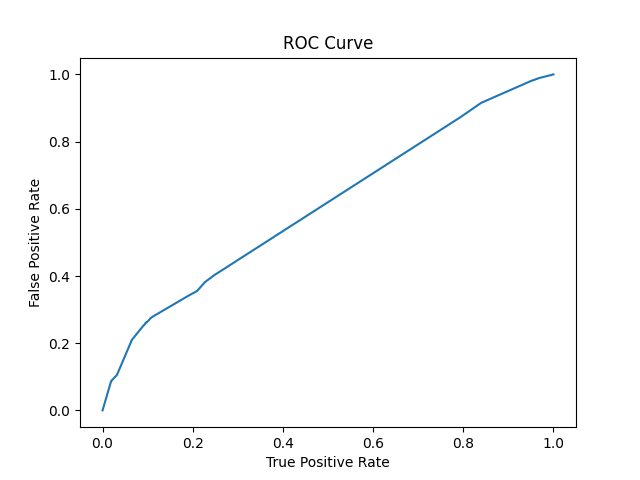

In [53]:
%matplot plt

In [117]:
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Training set areaUnderROC: 0.6095404429979303

### Precision Recall Curve

In [118]:
plt.clf()
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 0, 'Recall')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

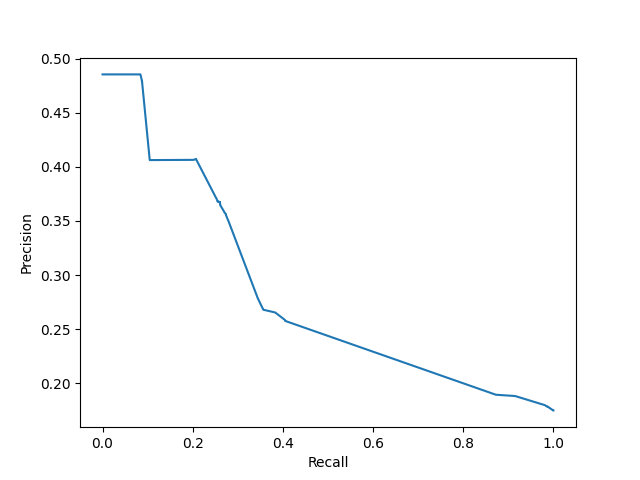

In [119]:
%matplot plt

### Accuracy 

In [76]:
summary = model.evaluate(test)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [77]:
summary.accuracy

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.8249958004367546

In [78]:
output = model.transform(test)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [79]:
output

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[label: int, features: vector, rawPrediction: vector, probability: vector, prediction: double]

### Probability Output

In [80]:
output.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|    0|(2236,[1001,1010,...|[1.92493603256215...|[0.87268785507102...|       0.0|
|    0|(2236,[1001,1010,...|[1.92493603256215...|[0.87268785507102...|       0.0|
|    0|(2236,[1001,1010,...|[1.92493603256215...|[0.87268785507102...|       0.0|
|    0|(2236,[1001,1010,...|[1.97747841445073...|[0.87841210285667...|       0.0|
|    0|(2236,[1002,1010,...|[1.48023647693555...|[0.81460829649386...|       0.0|
|    0|(2236,[1002,1010,...|[1.32035413035648...|[0.78924061855147...|       0.0|
|    0|(2236,[1002,1010,...|[1.32035413035648...|[0.78924061855147...|       0.0|
|    0|(2236,[1002,1010,...|[1.32035413035648...|[0.78924061855147...|       0.0|
|    0|(2236,[1002,1010,...|[1.32035413035648...|[0.78924061855147...|       0.0|
|    0|(2236,[10

In [81]:
output.select('label','prediction').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+----------+
|label|prediction|
+-----+----------+
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
+-----+----------+
only showing top 10 rows

### ROC

In [82]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [83]:
evaluator = BinaryClassificationEvaluator()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [84]:
print('Test Area Under ROC', evaluator.evaluate(output))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Test Area Under ROC 0.6119048499860108